<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/HW4/PUS2020_HW_4_how_to_read_and_map_census_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# author: Federica Bianco (@fedhere)

Notebook with examples of how to read and plot cenusus data in python



In [1]:
!pip install census
!pip install CensusData


In [2]:
!pip install us


In [3]:
!pip install geopandas
!pip install descartes

In [4]:
!pip install shapely

In [44]:
# module for mapping; if you are familiar with pandas this should be intuitive
import geopandas as gpd

In [5]:
import pandas as pd
import numpy as np
import pylab as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


# mounting your drive (My Drive) to read the api key from a csv file. Look at the readme for more info

In [15]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [16]:
pwd

'/content/gdrive/My Drive'

In [17]:
ls

'answer to TED fellow questions.gdoc'
'ARPA-e final report.gdoc'
'CALL 03 29.gdoc'
 clustering/
'Colab Notebooks'/
'Comparison of Chairs'\'' copy: LSST Science Collaboration Federation Charter & DRAFT: modified of Copy of Chairs'\'' copy: LSST Science Collaboration Federation Charter.gdoc'
'Comparison of Chairs'\'' copy: LSST Science Collaboration Federation Charter & LSST Science Collaboration Federation Charter - for distribution among SC leadership.gdoc'
'Comparison of Copy of Chairs'\'' copy: LSST Science Collaboration Federation Charter & DRAFT: modified of Copy of Chairs'\'' copy: LSST Science Collaboration Federation Charter.gdoc'
'compensation mode for CEC.gsheet'
'Copy of FirstBatchRankings.gsheet'
'Copy of November 23 evaluations.xlsx'
'Copy of Rubin Observatory LSST In-Kind Contributions 2019 - CEC Worksheet.gsheet'
'Copy of Second batch evaluation assignments (from 2019_12_09).xlsx'
'Copy of template form from UD DSI symposium.gform'
'Copy of UD Syllabus Template.gdoc'
'Cop

## read about the census API DO NOT PRINT IT! your API key should be secret

In [18]:
myAPIkey =  pd.read_csv("myapis.csv")["census"]


# example of reading race data at the county level.

In [22]:
# import modules to get census data
# register with your API key
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)

### look in the census variables the ones apprioriate for race. 

We are going to use the 5 year American Community Survey (```acs5```), which is ran by the Census Boureaum, but it is not the Census, in that it does not aspire to collect data about every US resident, but it is run more often (5 years). There is also an annual American Community Survey (```acs1```)

In [24]:
censusdata.search('acs5', 2018, 'concept', 'race')


[('B01001F_001E', 'SEX BY AGE (SOME OTHER RACE ALONE)', 'Estimate!!Total'),
 ('B01001F_002E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male'),
 ('B01001F_003E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001F_004E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001F_005E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001F_006E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001F_007E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001F_008E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001F_009E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001F_010E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001F_011E',
  'SEX

These are the variables that interest us. They start with B02001

('B02001_001E', 'RACE', 'Estimate!!Total'),

('B02001_002E', 'RACE', 'Estimate!!Total!!White alone'),

 ('B02001_003E', 'RACE', 'Estimate!!Total!!Black or African American alone'),

 

In [25]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B02001')), 


Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | RACE                           | !! Estimate Total                                        | int  
B02001_002E  | RACE                           | !! !! Estimate Total White alone                         | int  
B02001_003E  | RACE                           | !! !! Estimate Total Black or African American alone     | int  
B02001_004E  | RACE                           | !! !! Estimate Total American Indian and Alaska Native a | int  
B02001_005E  | RACE                           | !! !! Estimate Total Asian alone                         | int  
B02001_006E  | RACE                           | !! !! Estimate Total Native Hawaiian and Other Pacific I | int  
B02001_007E  | RACE                           | !! !! Estimate Total Some other race alone   

(None,)

get the state code for DE

In [26]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)


{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

get the data at county granularity. Tract granularity is not available for these data in this survey

In [35]:
total18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_001E"])
wDEcounty18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_002E"])
bDEcounty18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_003E"])
wDEcounty18.head()                                

,B02001_002E
"New Castle County, Delaware: Summary level: 050, state:10> county:003",358183
"Sussex County, Delaware: Summary level: 050, state:10> county:005",180762
"Kent County, Delaware: Summary level: 050, state:10> county:001",115960


# get the same data for the _previous_ ACS5 as well (remember, the ACS5 is done every 5 years)

## merge the blackpop dataframe with the total dataframe to extract the fraction of black people. 
## merge the whitepop dataframe with the total dataframe to extract the fraction of white people. 
 

In [ ]:
bDEcounty18 = bDEcounty18.merge....
bDEcounty18["black_fraction"] = .....

## the county index needs to be manipulated
The county name in the dataframes you created needs to be extracted from the index. 
Use the method ```split``` of a string on each row of the index. you can write a function such as

```
def getcounty(cname):
  return cname.split(':')[-1]
```
a function like this will extract the county from the name, this function can be passed to a column (the index in this case) of a dataframe to create a new colum as a modification of the previous one.

In [41]:
# manipulate index to extract the county
wDEcounty18["county"] = wDEcounty18.index.astype(str).map(getcounty)
bDEcounty18["county"] = bDEcounty18.index.astype(str).map(getcounty)
.....
bDEcounty13

,B02001_003E,B02001_001E,black_fraction,county
"Kent County, Delaware: Summary level: 050, state:10> county:001",39802,165030,0.241180,003
"New Castle County, Delaware: Summary level: 050, state:10> county:003",130133,542784,0.239751,005
"Sussex County, Delaware: Summary level: 050, state:10> county:005",25029,200632,0.124751,001


# Get the DE shape file. 

Lets get it at the census tract level, even if we only have data at the county level right now
## download census tracts file from here  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
## and here  https://www2.census.gov/geo/tiger/TIGER2018/COUNTY/tl_2018_us_county.zip


In [42]:
!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip

--2020-09-25 13:59:24--  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
Resolving www2.census.gov (www2.census.gov)... 23.76.87.160, 2600:1417:76:497::208c, 2600:1417:76:490::208c
Connecting to www2.census.gov (www2.census.gov)|23.76.87.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_10_tract.zip.1’

tl_2018_10_tract.zi     [            <=>     ] 997.34K   344KB/s    in 2.9s    

2020-09-25 13:59:29 (344 KB/s) - ‘tl_2018_10_tract.zip.1’ saved [1021272]



In [43]:
#save it on the drive, unzip it
!unzip tl_2018_10_tract.zip

Archive:  tl_2018_us_county.zip
replace tl_2018_us_county.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  tl_2018_10_tract.zip
replace tl_2018_10_tract.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: tl_2018_10_tract.cpg    
  inflating: tl_2018_10_tract.dbf    
  inflating: tl_2018_10_tract.prj    
  inflating: tl_2018_10_tract.shp    
  inflating: tl_2018_10_tract.shp.ea.iso.xml  
  inflating: tl_2018_10_tract.shp.iso.xml  
  inflating: tl_2018_10_tract.shx    


In [45]:
gde = gpd.GeoDataFrame.from_file("....")
gde.shape

(218, 13)

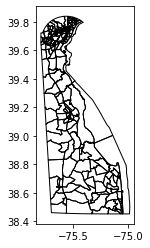

In [46]:
gde.plot(color="None", edgecolor='k')

This map includes census tracts that are all water in the Delaware rever. Remove them using the ALAND column, which is the area of the tract that is not water

In [ ]:
#delete
# only select where the land is >0
gde = ....
gde.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824..."
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607..."
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451..."
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549..."
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710..."


Now merge the geo data frame with the data frame. 
IMPORTANT! start the merge from the geodataframe:
```gde.merge...```. 
if you start it from the dataframe (```wDEcounty.merge```) you end up with a dataframe, not a geodataframe

In [ ]:
whiteDE18 = gde.merge...

In [ ]:
blackDE18 = gde.merge...

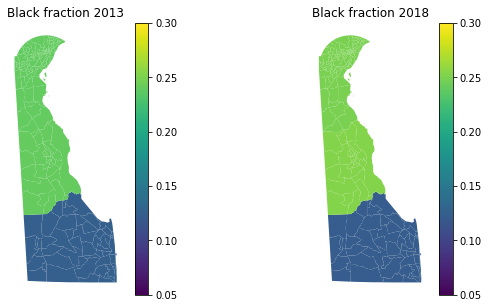

In [70]:
# map the fraction of Black populatoin in 2018 and 2013
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
blackDE13.plot(column="black_fraction", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.05, vmax=0.30)
ax.axis('off');
plt.title("Black fraction 2013")

ax = fig.add_subplot(122)
blackDE18.plot(column="black_fraction", 
               ax=ax, legend=True, vmin=0.05, vmax=0.30);
ax.axis('off');
plt.title("Black fraction 2018");

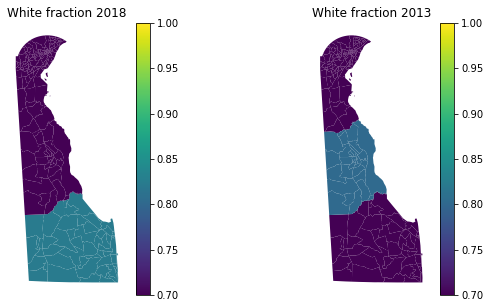

In [ ]:
# do the same for the white population
...

# extra credit

Can you get a map of a demographic variable (e.g. age, education...) at the tract level?

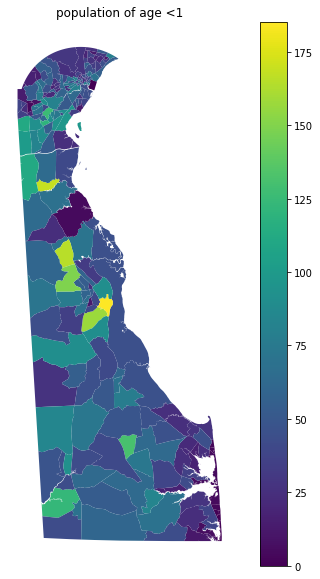